In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression as sk_lr
from sklearn.linear_model import LogisticRegression as sk_log_r
import gc
np.random.seed(42)

### 1) Linear Regression

##### 1.1 Creating custom dataset for testing model

In [2]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples=1000,
                             n_features=2,
                             n_informative=2,
                             noise=10.0,
                             bias=1.0,
                             coef=True,
                             random_state=42)

In [3]:
df = pd.DataFrame(
           data={'feature1':X[:,0],
                 'feature2':X[:,1],
                 'target (y)':y, 
                 'weight1':coef[0],
                 'weight2':coef[1], 
                 'bias':1 , 
                 'y_hat': ((coef[0]*X[:,0])+(coef[1]*X[:,1]))+1 })
df.head()

,feature1,feature2,target (y),weight1,weight2,bias,y_hat
0,-0.167118,0.146714,-13.996950,40.710649,6.600984,1,-4.835031
1,-0.020902,0.117327,-11.678089,40.710649,6.600984,1,0.923559
2,0.150419,0.364961,18.775455,40.710649,6.600984,1,9.532753
3,0.555604,0.089581,7.661465,40.710649,6.600984,1,24.210339
4,0.058209,-1.142970,-13.195530,40.710649,6.600984,1,-4.175014


In [4]:
X=df.drop(columns=['target (y)','weight1','weight2','bias','y_hat'],index=None)
Y=df['target (y)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

##### 1.2 Training the custom made model with the dataset

In [5]:
#Import our custom model
from my_lib.LinearRegression_LinAlg import LinearRegression as custom_lr
# from my_lib.LinearRegression_GradDesc import LinearRegression as custom_lr

In [6]:
custom_model=custom_lr()
custom_model.train(X_train,Y_train)
print("Model Trained")
print("Custom model weights=", custom_model.coefficient)
print("Custom model bias=:", custom_model.bias)

Model Trained
Custom model weights= [41.39506319  6.6740871 ]
Custom model bias=: 1.1125160830930998


In [7]:
Y_pred = custom_model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
accuracy

0.9362992668663301

##### 1.3 Custom model VS sci-kit learn's regression 

In [8]:
model=sk_lr()
model.fit(X_train,Y_train)
print("Model Trained")
print("Sklearn weights=", model.coef_)
print("Sklearn bias=:", model.intercept_)

Model Trained
Sklearn weights= [41.39506319  6.6740871 ]
Sklearn bias=: 1.1125160830930987


In [9]:
Y_pred = model.predict(X_test)
accuracy = r2_score(Y_test, Y_pred)
accuracy

0.9362992668663301

In [10]:
del X, y, coef, df, X_train, X_test, Y_train, Y_test, Y_pred, accuracy
gc.collect();

### 2) Logistic Regression

##### 2.1 Creating custom dataset for testing model

In [11]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=2,
                           n_redundant=1,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.1,
                           random_state=42)
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = Y
df


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.317453,0.768328,-0.332860,-1.218005,1.440387,1
1,1.065172,0.337779,1.452617,-0.828461,0.979448,1
2,0.466671,1.567346,1.521006,0.818854,-0.965285,0
3,1.497432,0.224761,1.857702,-1.157030,1.367534,1
4,-1.366858,1.150180,0.592567,-0.934416,1.105847,1
...,...,...,...,...,...,...
995,-1.951102,-0.125265,0.143588,-1.158613,1.368888,1
996,-0.889241,1.772590,0.955301,0.508680,-0.598465,0
997,-1.153332,1.513910,-1.687344,-1.162699,1.376134,1
998,-1.070852,1.098807,1.911419,-0.807573,0.955887,1


In [12]:
X=df.drop(columns=['Target'],index=None)
Y=df['Target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

##### 2.2 Training our Model with the dataset

In [13]:
#Importing our Custom Model
from my_lib.LogisticRegression import LogisticRegression as custom_log_r

In [14]:
custom_classifier=custom_log_r()
custom_classifier.train(X_train,Y_train)
print("Model Trained")
print("Custom classifier weights=", custom_classifier.coefficient)
print("Custom classifier bias=:", custom_classifier.bias)

Model Trained
Custom classifier weights= [ 0.0382751  -0.01048686 -0.08953879 -0.90262316  1.06656721]
Custom classifier bias=: 0.05553653328267255


In [15]:
Y_pred = custom_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.825

##### 2.3 Custom Model vs SkLearn Classifier

In [16]:
classifier=sk_log_r()
classifier.fit(X_train,Y_train)
print("Model Trained")
print("Sklearn Classifier weights=", classifier.coef_)
print("Sklearn Classifier bias=:", classifier.intercept_)

Model Trained
Sklearn Classifier weights= [[ 0.07504523 -0.22494571 -0.13279759 -1.1255616   1.32968553]]
Sklearn Classifier bias=: [0.51550855]


In [17]:
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy

0.835

In [18]:
del X, Y, df, X_train, X_test, Y_train, Y_test, Y_pred, accuracy
gc.collect();

### 3) Encoders

##### 3.1 One Hot Encoder

In [19]:
import pandas as pd
from my_lib.Encoders import OneHotEncoder
onehotencoder=OneHotEncoder()

In [20]:
df=pd.read_csv("sample_data.csv")
df

,Age,Gender,Dept,Education,Type
0,26,Male,Police,Bachelor's,Cadre
1,31,Male,Tax,Pass,Non-Cadre
2,24,Female,Admin,Master's,Cadre
3,34,Male,Tax,Pass,Cadre
4,27,Male,Admin,Bachelor's,Cadre
5,28,Female,Admin,Bachelor's,Cadre
6,25,Female,Tax,Master's,Cadre
7,30,Male,Police,Pass,Non-Cadre
8,29,Female,Admin,Pass,Non-Cadre
9,33,Male,Tax,Bachelor's,Non-Cadre


In [21]:
df=onehotencoder.transform(df,['Gender','Dept'],drop_first=True)
df

,Age,Education,Type,Gender_Female,Dept_Tax,Dept_Admin
0,26,Bachelor's,Cadre,0,0,0
1,31,Pass,Non-Cadre,0,1,0
2,24,Master's,Cadre,1,0,1
3,34,Pass,Cadre,0,1,0
4,27,Bachelor's,Cadre,0,0,1
5,28,Bachelor's,Cadre,1,0,1
6,25,Master's,Cadre,1,1,0
7,30,Pass,Non-Cadre,0,0,0
8,29,Pass,Non-Cadre,1,0,1
9,33,Bachelor's,Non-Cadre,0,1,0


In [22]:
onehotencoder.feature_names

{'Gender': array(['Male', 'Female'], dtype=object),
 'Dept': array(['Police', 'Tax', 'Admin'], dtype=object)}

##### 3.2 Ordinal Encoder

In [23]:
from my_lib.Encoders import OrdinalEncoder
ordinalencoder = OrdinalEncoder()

Here, the order of 'Education' matters, so a parameter named category is passed where the order of variables is mentioned

In [24]:
features=['Education','Type']
categories=[["Pass","Bachelor's","Master's"],None]
df=ordinalencoder.transform(df,['Education','Type'],category=categories)
df

,Age,Education,Type,Gender_Female,Dept_Tax,Dept_Admin
0,26,1,0,0,0,0
1,31,0,1,0,1,0
2,24,2,0,1,0,1
3,34,0,0,0,1,0
4,27,1,0,0,0,1
5,28,1,0,1,0,1
6,25,2,0,1,1,0
7,30,0,1,0,0,0
8,29,0,1,1,0,1
9,33,1,1,0,1,0


In [25]:
ordinalencoder.feature_maps

[{'Pass': 0, "Bachelor's": 1, "Master's": 2}, {'Cadre': 0, 'Non-Cadre': 1}]

In [26]:
del df,features,categories,onehotencoder
gc.collect();

 ### 4) Feature Scaling

In [27]:
from my_lib.FeatureScaling import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

In [28]:
df = pd.DataFrame({
    'A': np.random.normal(0, 1, 1000),
    'B': np.random.exponential(1, 1000),
    'C': np.random.uniform(0, 10, 1000),
    'D': np.random.randint(0, 100, 1000)
})
df

,A,B,C,D
0,1.404543,0.606821,0.414992,24
1,-1.605543,0.310954,6.370947,37
2,0.503816,0.248212,5.972924,13
3,-2.153879,0.141009,6.533835,7
4,0.707212,1.945817,1.923099,90
...,...,...,...,...
995,-0.275510,0.332402,1.715964,27
996,0.914022,0.542286,1.674597,4
997,-0.948445,0.346041,4.625935,20
998,1.411877,0.403775,0.332680,17


In [29]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()

In [30]:
scaled_df=pd.DataFrame(index=df.index)
scaled_df['A_scaled'] = standard_scaler.fit_transform(df[['A']])
scaled_df['B_scaled'] = minmax_scaler.fit_transform(df[['B']])
scaled_df['C_scaled'] = maxabs_scaler.fit_transform(df[['C']])
scaled_df['D_scaled'] = robust_scaler.fit_transform(df[['D']])
scaled_df

,A_scaled,B_scaled,C_scaled,D_scaled
0,1.356495,0.078828,0.041598,-0.54
1,-1.576543,0.040366,0.638613,-0.28
2,0.478823,0.032210,0.598716,-0.76
3,-2.110843,0.018273,0.654940,-0.88
4,0.677012,0.252896,0.192768,0.78
...,...,...,...,...
995,-0.280555,0.043154,0.172005,-0.48
996,0.878529,0.070439,0.167859,-0.94
997,-0.936264,0.044927,0.463696,-0.62
998,1.363640,0.052433,0.033347,-0.68


In [31]:
norm_rows=normalizer.transform(df)
normalized_df = pd.DataFrame(norm_rows, columns=df.columns+'_normalized')
normalized_df

,A_normalized,B_normalized,C_normalized,D_normalized
0,0.058395,0.025229,0.017254,0.997826
1,-0.042723,0.008274,0.169530,0.984564
2,0.035189,0.017336,0.417176,0.907979
3,-0.219430,0.014365,0.665644,0.713135
4,0.007854,0.021610,0.021357,0.999507
...,...,...,...,...
995,-0.010182,0.012285,0.063418,0.997859
996,0.204721,0.121460,0.375073,0.895911
997,-0.046147,0.016837,0.225075,0.973102
998,0.082728,0.023659,0.019493,0.996101


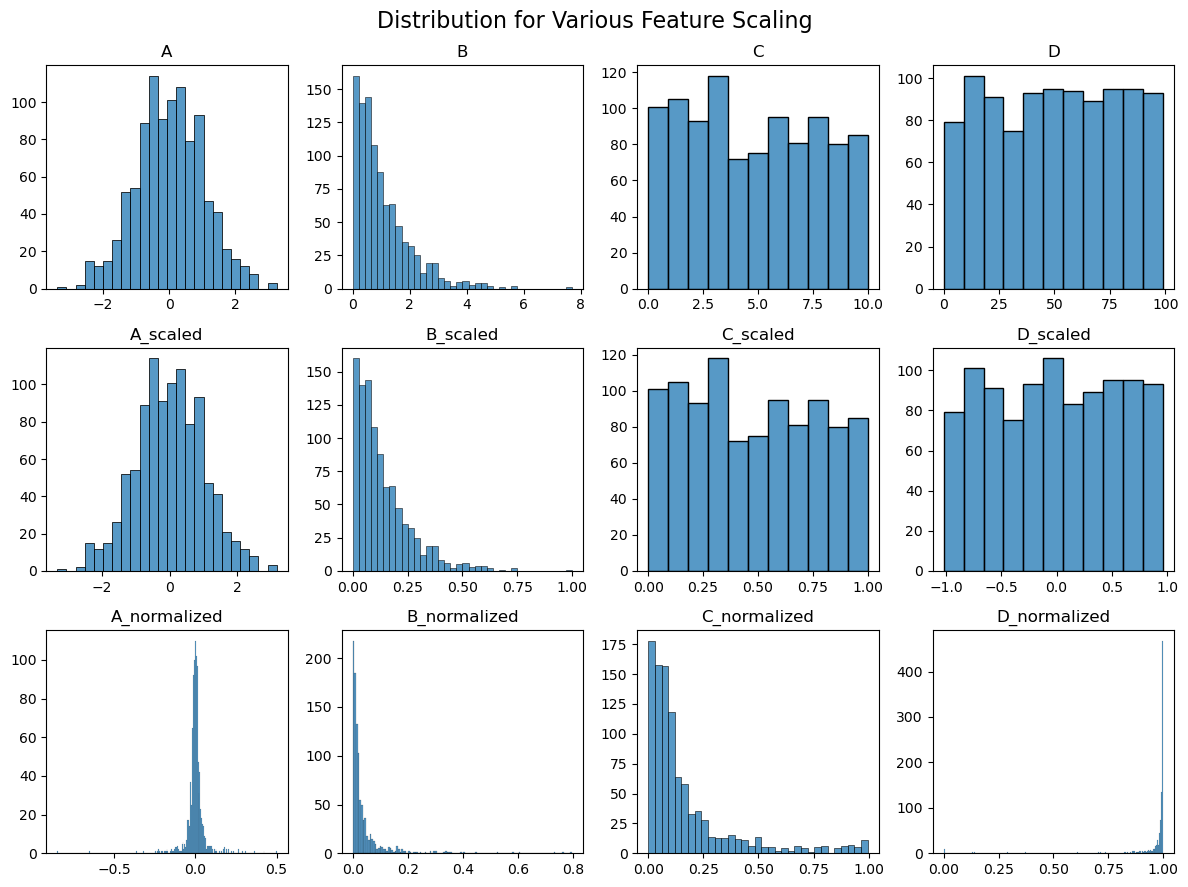

In [32]:
plt.subplots(figsize=(12, 9))
cols=df.columns.tolist() + scaled_df.columns.tolist() + normalized_df.columns.tolist()
for i, col in enumerate(cols):
    plt.subplot(3, 4, i+1)
    if i<=3:
        sns.histplot(df[col])
    elif i<=7:
        sns.histplot(scaled_df[col])
    else:
        sns.histplot(normalized_df[col])
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('')  # Remove y-axis label
    plt.title(col)
plt.suptitle('Distribution for Various Feature Scaling', fontsize=16)
plt.tight_layout()

In [33]:
del df,scaled_df,normalized_df,standard_scaler,minmax_scaler,maxabs_scaler,robust_scaler,normalizer
gc.collect();

 ### 5) Decision Tree Classifier

In [34]:
from pprint import pprint
from my_lib.DecisionTree import Decision_Tree_Classifier
classifier=Decision_Tree_Classifier()

In [35]:
df=pd.read_csv('mushroom_data.csv')
df

,Cap Color,Stalk Shape,Solitary,Edible
0,Brown,Tapering,Yes,1
1,Brown,Enlarging,Yes,1
2,Brown,Enlarging,No,0
3,Brown,Enlarging,No,0
4,Brown,Tapering,Yes,1
5,Red,Tapering,Yes,0
6,Red,Enlarging,No,0
7,Brown,Enlarging,Yes,1
8,Red,Tapering,No,1
9,Brown,Enlarging,No,0


In [36]:
y=np.array(df.Edible)
x=df.drop("Edible", axis=1)

In [37]:
features=['Cap Color','Stalk Shape','Solitary']
x=ordinalencoder.transform(x,features)
x=np.array(x)

In [38]:
tree=classifier.build_tree(x,y)
pprint(tree,width=1)

{2: {'left': {0: {'left': 0,
                  'right': 1}},
     'right': {1: {'left': 1,
                   'right': 0}}}}


In [39]:
del df,x,y,features,classifier
gc.collect();

 ### 6) K-Means Clustering

In [45]:
from my_lib.K_Means_Clustering import Kmeans
clusterer=Kmeans()

In [46]:
df=pd.read_csv('kmeans_test_dataset_4_clusters.csv')
X=df.drop('Cluster',axis=1).to_numpy()

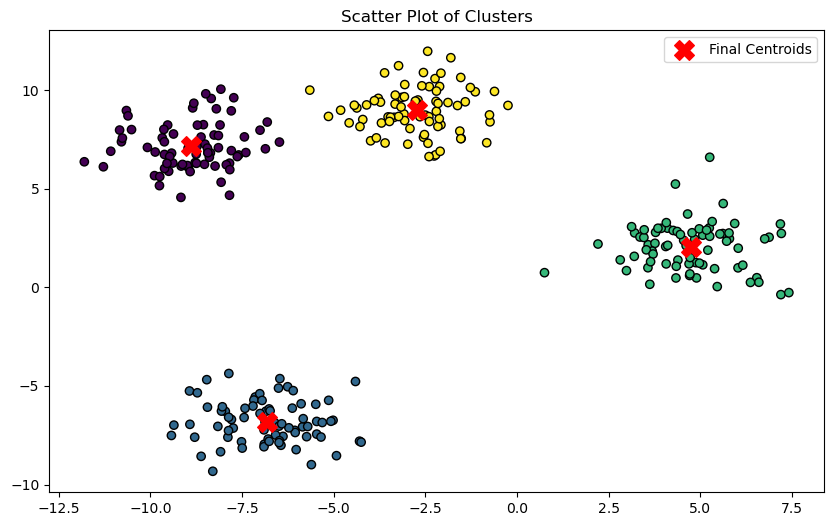

In [47]:
max_iters, k = 20, 4
clusterer.fit_kmeans(X,k,max_iters,plot=True)

In [48]:
clusterer.centroids

array([[-8.88062107,  7.14479553],
       [-6.82289702, -6.82052706],
       [ 4.73387011,  2.05552217],
       [-2.7332785 ,  8.96731218]])

In [49]:
del df,X,k,max_iters,clusterer
gc.collect();